In [167]:
# Import Library
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import numpy as np

In [168]:
df=pd.read_csv('StudentsPerformance.csv') # Deklarasi df sebagai variabel yang menyimpan data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [281]:
interval = np.arange(0, 110, 10)
label = np.vectorize(lambda x: f"{x}-{x + 10}")(np.arange(0, 100, 10))

reading_score_total = df.groupby(pd.cut(df["reading score"], interval, labels=label))["reading score"].count().to_list()
writing_score_total = df.groupby(pd.cut(df["writing score"], interval, labels=label))["writing score"].count().to_list()

reading_score_df = pd.DataFrame({ 'Interval': label, 'Total Nilai Reading Score': reading_score_total })
writing_score_df = pd.DataFrame({ 'Interval': label, 'Total Nilai Writing Score': writing_score_total })
print(reading_score_df)
print("\n")
print(writing_score_df)

  Interval  Total Nilai Reading Score
0     0-10                          0
1    10-20                          1
2    20-30                          7
3    30-40                         19
4    40-50                         70
5    50-60                        178
6    60-70                        238
7    70-80                        252
8    80-90                        173
9   90-100                         62


  Interval  Total Nilai Writing Score
0     0-10                          1
1    10-20                          2
2    20-30                          7
3    30-40                         25
4    40-50                         89
5    50-60                        177
6    60-70                        243
7    70-80                        248
8    80-90                        140
9   90-100                         68


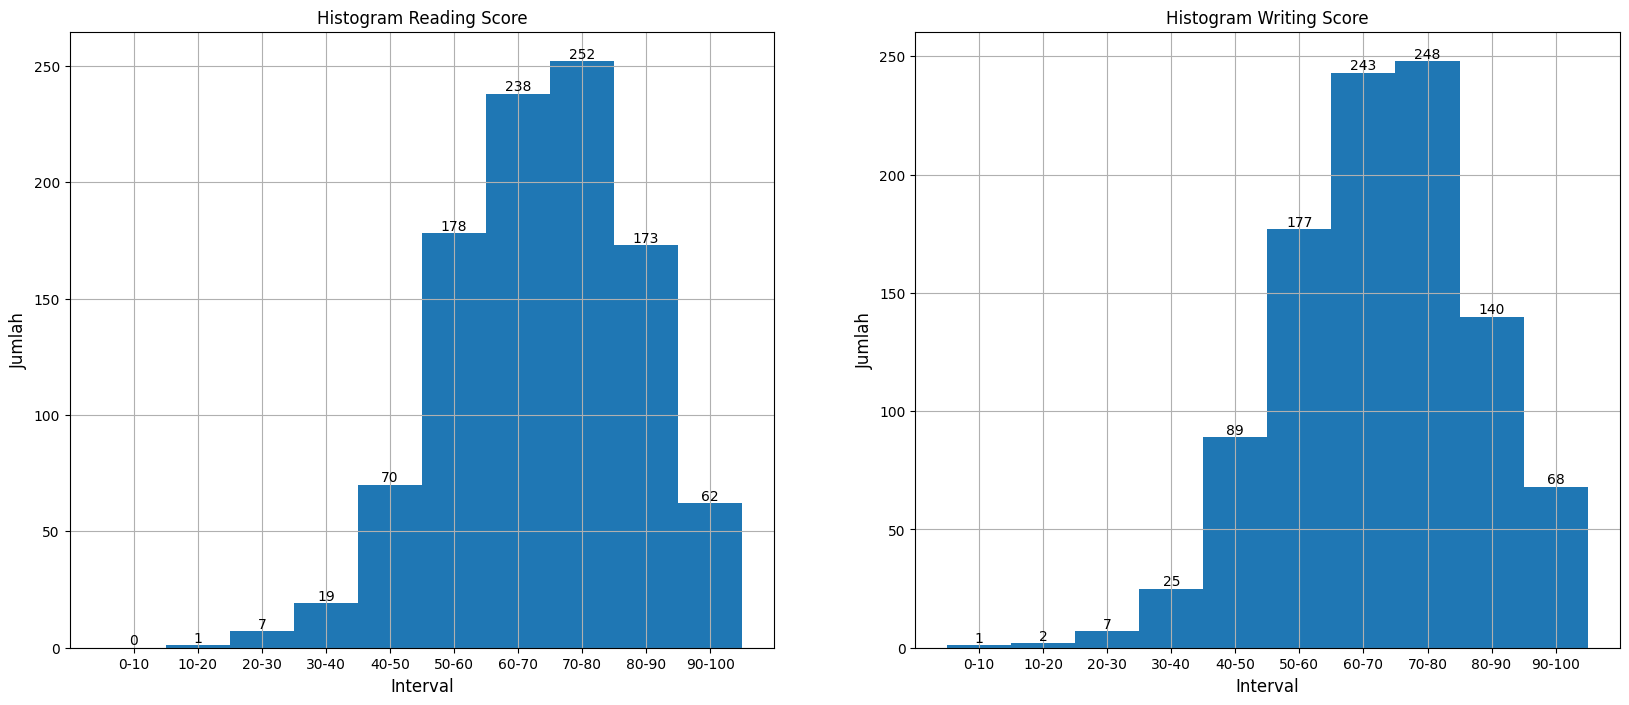

In [289]:
fig, (bar1,bar2)=plt.subplots(1,2,figsize=(20,8))
reading_score_bar = bar1.bar(label, reading_score_total, color='lightgreen', width=1.0)
writing_score_bar =  bar2.bar(label, writing_score_total, width=1.0, color='red')
bar1.bar(label,reading_score_total, width=1.0)
bar1.grid()
bar1.bar_label(reading_score_bar)
bar1.set_xlabel('Interval', fontsize=12)
bar1.set_ylabel('Jumlah', fontsize=12)
bar1.set_title('Histogram Reading Score')
bar2.bar(label,writing_score_total, width=1.0)
bar2.grid()
bar2.bar_label(writing_score_bar)
bar2.set_title('Histogram Writing Score')
bar2.set_xlabel('Interval', fontsize=12)
bar2.set_ylabel('Jumlah', fontsize=12)
plt.show()

In [290]:
mean_read=df['reading score'].mean()
median_read=df['reading score'].median()
modus_read=df['reading score'].mode()[0]
min_read=df['reading score'].min()
max_read=df['reading score'].max()

mean_write=df['writing score'].mean()
median_write=df['writing score'].median()
modus_write=df['writing score'].mode()[0]
min_write=df['writing score'].min()
max_write=df['writing score'].max()

table_b = PrettyTable(["", "Nilai Tendensi Central", "Hasil"])
table_b.align = "l"

table_b.add_row(["Reading Score", "Rata-rata",mean_read])
table_b.add_row([" ", "Median",median_read])
table_b.add_row([" ", "Modus",modus_read])
table_b.add_row([" ", "Min",min_read])
table_b.add_row([" ", "Max",max_read])
table_b.add_row(["","",""])
table_b.add_row(["Writing Score", "Rata-rata",mean_write])
table_b.add_row([" ", "Median",median_write])
table_b.add_row([" ", "Modus",modus_write])
table_b.add_row([" ", "Min",min_write])
table_b.add_row([" ", "Max",max_write])
print(table_b)

+---------------+------------------------+--------+
|               | Nilai Tendensi Central | Hasil  |
+---------------+------------------------+--------+
| Reading Score | Rata-rata              | 69.169 |
|               | Median                 | 70.0   |
|               | Modus                  | 72     |
|               | Min                    | 17     |
|               | Max                    | 100    |
|               |                        |        |
| Writing Score | Rata-rata              | 68.054 |
|               | Median                 | 69.0   |
|               | Modus                  | 74     |
|               | Min                    | 10     |
|               | Max                    | 100    |
+---------------+------------------------+--------+


In [302]:
Jangkauan_read=max_read-min_read
Jangkauan_write=max_write-min_write
q1_read=np.quantile(df['reading score'],.25)
q3_read=np.quantile(df['reading score'],.75)
q1_write=np.quantile(df['writing score'],.25)
q3_write=np.quantile(df['writing score'],.75)
interquartil_read=(q3_read-q1_read)/2
interquartil_write=(q3_write-q1_write)/2
varian_read=df['reading score'].var()
varian_write=df['writing score'].var()
std_read=df['reading score'].std()
std_write=df['writing score'].std()

tabel_c = PrettyTable(["", "Nilai Variasi", "Hasil"])
tabel_c.align = "l"

tabel_c.add_row(["Reading Score", "Jangkauan Range",Jangkauan_read])
tabel_c.add_row([" ", "Kisaran Interkuartil",interquartil_read])
tabel_c.add_row([" ", "Varians",varian_read])
tabel_c.add_row([" ", "Standar Deviasi",std_read])
tabel_c.add_row(["","",""])
tabel_c.add_row(["Writing Score", "Jangkauan Range",Jangkauan_write])
tabel_c.add_row([" ", "Kisaran Interkuartil",interquartil_write])
tabel_c.add_row([" ", "Varians",varian_write])
tabel_c.add_row([" ", "Standar Deviasi",std_write])
print(tabel_c)


+---------------+----------------------+--------------------+
|               | Nilai Variasi        | Hasil              |
+---------------+----------------------+--------------------+
| Reading Score | Jangkauan Range      | 83                 |
|               | Kisaran Interkuartil | 10.0               |
|               | Varians              | 213.16560460460462 |
|               | Standar Deviasi      | 14.600191937252216 |
|               |                      |                    |
| Writing Score | Jangkauan Range      | 90                 |
|               | Kisaran Interkuartil | 10.625             |
|               | Varians              | 230.907991991992   |
|               | Standar Deviasi      | 15.19565701086965  |
+---------------+----------------------+--------------------+


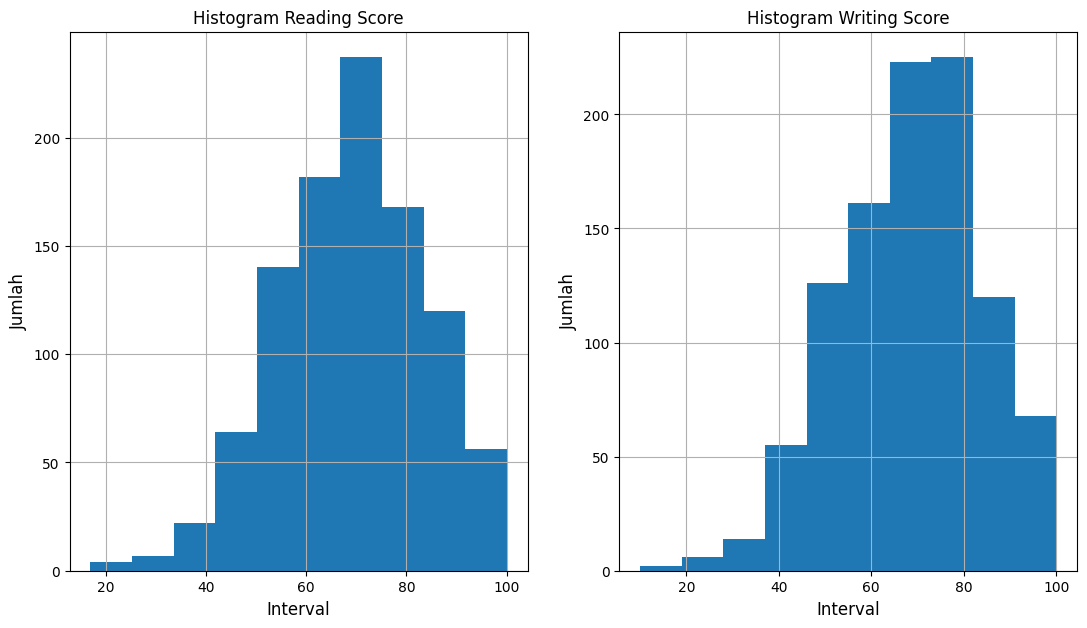

In [303]:
fig, (his1,his2)=plt.subplots(1,2,figsize=(13,7))
his1.grid()
his1.hist(df['reading score'])
his1.set_xlabel('Interval', fontsize=12)
his1.set_ylabel('Jumlah', fontsize=12)
his1.set_title('Histogram Reading Score')
his2.grid()
his2.hist(df['writing score'])
his2.set_xlabel('Interval', fontsize=12)
his2.set_ylabel('Jumlah', fontsize=12)
his2.set_title('Histogram Writing Score')
plt.show()

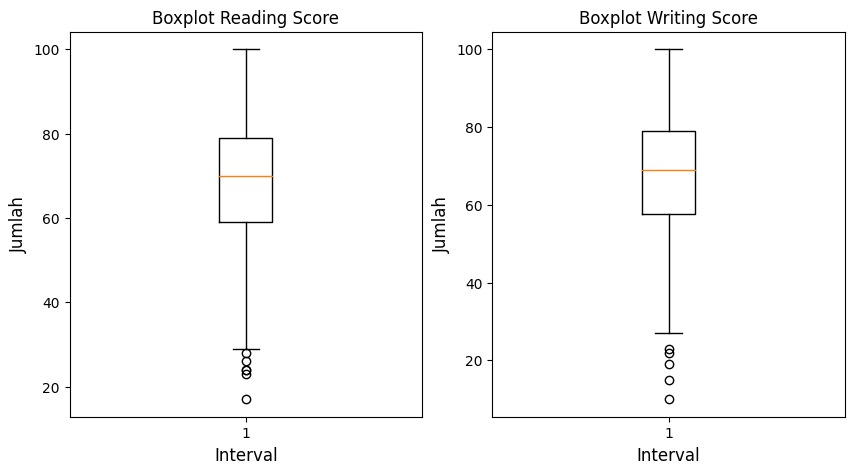

In [316]:
fig, (box1,box2)=plt.subplots(1,2,figsize=(10,5))
box1.set_xlabel('Interval', fontsize=12)
box1.set_ylabel('Jumlah', fontsize=12)
box1.set_title('Boxplot Reading Score')
box1.boxplot(df['reading score'])
box2.boxplot(df['writing score'])
box2.set_xlabel('Interval', fontsize=12)
box2.set_ylabel('Jumlah', fontsize=12)
box2.set_title('Boxplot Writing Score')
plt.show()

In [317]:
skew_read=df['reading score'].skew()
skew_write=df['writing score'].skew()
kurt_read=df['reading score'].kurt()
kurt_write=df['writing score'].kurt()
tabel_d=PrettyTable(["Data"," Skewness","Kurtosis"])
tabel_d.add_row(["Reading Score",skew_read,kurt_read])
tabel_d.add_row(["Writing Score",skew_write,kurt_write])
print(tabel_d)

+---------------+----------------------+----------------------+
|      Data     |       Skewness       |       Kurtosis       |
+---------------+----------------------+----------------------+
| Reading Score | -0.25910451810923063 | -0.0682654585647704  |
| Writing Score | -0.28944397150761897 | -0.03336461500693577 |
+---------------+----------------------+----------------------+


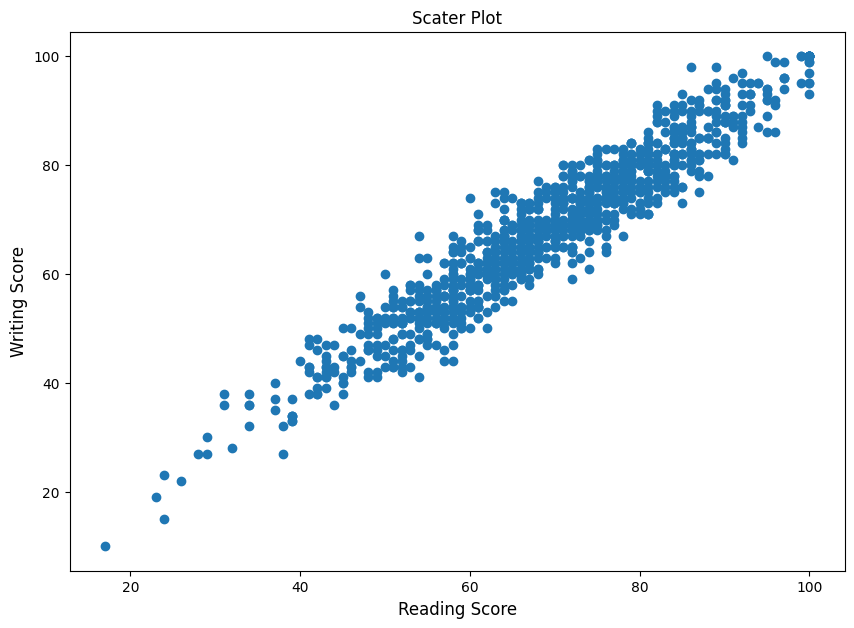

In [318]:
plt.figure(figsize=(10,7))
plt.xlabel('Reading Score', fontsize=12)
plt.ylabel('Writing Score', fontsize=12)
plt.title('Scater Plot')
plt.scatter(df['reading score'],df['writing score'])
plt.show()